In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Printing first 5 rows
dataset = pd.read_csv('CIC-ToN-IoT-frac.csv')
pd.set_option('display.max_columns', None) 
dataset.head()


,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,2304181,192.168.1.39-192.168.1.195-39426-80-6,192.168.1.39,39426,192.168.1.195,80,6,27/04/2019 05:30:53 pm,29981,3,4,310.0,1282.0,310.0,0.0,103.333333,178.978583,883.0,0.0,320.500000,419.527115,53100.296855,233.481205,4.996833e+03,11787.408696,29057.0,41.0,621.0,310.5,381.130555,580.0,41.0,29687.0,9895.666667,16877.391929,29384.0,149.0,0,0,0,0,80,92,100.063373,133.417831,0.0,883.0,199.0,320.308334,102597.428571,1,2,0,3,6,0,0,0,1.0,227.428571,103.333333,320.500000,0,0,0,0,0,0,0,44,0,183,29200,1025,1,20,0.0,0.0,0.0,0.0,1.556350e+15,0.000000e+00,1.556350e+15,1.556350e+15,1,xss
1,780313,187.221.192.168-1.31.192.168-0-0-0,187.221.192.168,0,1.31.192.168,0,0,24/04/2019 05:17:21 pm,14258043,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.140272,1.425804e+07,0.000000,14258043.0,14258043.0,14258043.0,14258043.0,0.000000,14258043.0,14258043.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,0,0,0.140272,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,7.780451e+14,1.100322e+15,1.556090e+15,1.425804e+07,0,Benign
2,4888722,192.168.1.35-192.168.1.152-59822-80-6,192.168.1.35,59822,192.168.1.152,80,6,27/04/2019 10:01:42 pm,218952,6,3,2644.0,1318.0,1448.0,0.0,440.666667,687.313223,1318.0,0.0,439.333333,760.947655,18095.290292,41.104900,2.736900e+04,70635.425734,202016.0,12.0,218952.0,43790.4,88549.969121,202016.0,12.0,9868.0,4934.000000,3545.433401,7441.0,2427.0,0,0,0,0,200,104,27.403266,13.701633,0.0,1448.0,396.2,640.702705,410499.955556,1,2,0,2,8,0,0,0,0.0,440.222222,440.666667,439.333333,0,0,0,0,0,0,0,293,0,146,29200,268,2,32,0.0,0.0,0.0,0.0,1.556367e+15,0.000000e+00,1.556367e+15,1.556367e+15,1,xss
3,1891498,192.168.1.195-192.168.1.36-80-60456-6,192.168.1.195,80,192.168.1.36,60456,6,27/04/2019 04:46:28 pm,431,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,4640.371230,4.310000e+02,0.000000,431.0,431.0,431.0,431.0,0.000000,431.0,431.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,0,4640.371230,0.000000,0.0,0.0,0.0,0.000000,0.000000,1,0,0,0,2,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,8212,0,0,20,0.0,0.0,0.0,0.0,1.556348e+15,0.000000e+00,1.556348e+15,1.556348e+15,0,Benign
4,1390854,192.168.1.36-192.168.1.152-36724-80-6,192.168.1.36,36724,192.168.1.152,80,6,27/04/2019 04:06:55 pm,945,3,4,381.0,483.0,381.0,0.0,127.000000,219.970453,483.0,0.0,120.750000,241.500000,914285.714286,7407.407407,1.575000e+02,146.856052,384.0,11.0,539.0,269.5,202.939646,413.0,126.0,676.0,225.333333,192.630043,384.0,11.0,0,0,0,0,104,136,3174.603175,4232.804233,0.0,483.0,108.0,201.826658,40734.000000,1,2,0,2,6,0,0,0,1.0,123.428571,127.000000,120.750000,0,0,0,0,0,0,0,54,0,69,29200,235,1,32,0.0,0.0,0.0,0.0,1.556345e+15,0.000000e+00,1.556345e+15,1.556345e+15,1,xss


In [4]:
print(dataset.columns)

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag

# Preprocessing the data

In [5]:
# Dropping irrelevant columns but keeping 'label'
columns_to_drop = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']  # Keep 'label'
data = dataset.drop(columns=columns_to_drop)

In [6]:
# Splitting the dataset into 80% train, 20% test (I want to work only on 20% dataset)
_, data_20_percent = train_test_split(data, test_size=0.2, random_state=42)

In [7]:
# Separate the features and labels (keep the 'label' column)
X = data_20_percent.drop('Attack', axis=1)  
y = data_20_percent['Attack']  # 'Attack' is the column defining attack class types
labels = data_20_percent['Label']  # 'label' = 1 means attack, 'label' = 0 means not an attack

### Replacing empty and infinte values with column mean

In [8]:
# Replacing empty and infinite values with column mean
# Replace 'inf' and '-inf' with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

X.fillna(X.mean(), inplace=True)

#  Now proceed with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
unique_attack_classes = y.unique()
print(f"Attack Classes: {unique_attack_classes}")

# Choose 1 attack class to exclude (the unknown attack class)
attack_class_to_exclude = 'dos'  
unique_attack_classes = y.unique()

Attack Classes: ['xss' 'Benign' 'injection' 'password' 'scanning' 'backdoor' 'ransomware'
 'mitm' 'ddos' 'dos']


### Create a dataset without the excluded attack class

In [42]:
X_known = X_scaled[(y != attack_class_to_exclude)]  # Only attack rows (label = 1) except one attack class
y_known = y[(y != attack_class_to_exclude)]

# Reset indices to align them
X_known = pd.DataFrame(X_known).reset_index(drop=True)
y_known = y_known.reset_index(drop=True)

In [43]:
print(f"all the unique classes prestn in modified dataset :{y_known.unique()}")
import pandas as pd

# Set display options to show more columns (optional)
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set the display width

# Print X_known and y_known as a proper table
print("First few rows of X_known:")
print(X_known.head())

print("\nFirst few rows of y_known:")
print(y_known.head())


all the unique classes prestn in modified dataset :['xss' 'Benign' 'injection' 'password' 'scanning' 'backdoor' 'ransomware'
 'mitm' 'ddos']
First few rows of X_known:
         0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32       33   34   35   36        37        38        39        40        41        42        43        44        45        46        47        48        49        50   51        52        53        54        55        56        57   58   59   60        61        62        63        64        65   66        67        68        69        70        71        72        73        74        75        76        77        78        79        80
0  1.350975  0.637629 -0.712375 -0.191736 -0.040396 -0.000535

In [44]:
# Check the number of rows and columns in X_known
print(f"Shape of X_known (Rows, Columns): {X_known.shape}")

# Check the number of rows (values) in y_known
print(f"Shape of y_known (Rows,): {y_known.shape}")

# Alternatively, if you just want the number of rows:
print(f"Number of rows in X_known: {X_known.shape[0]}")
print(f"Number of values in y_known: {y_known.shape[0]}")


Shape of X_known (Rows, Columns): (535159, 81)
Shape of y_known (Rows,): (535159,)
Number of rows in X_known: 535159
Number of values in y_known: 535159


# CNN Model

In [45]:
# Step 6: Define a CNN model (for feature extraction)
def create_cnn_model(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.GlobalAveragePooling1D())
    return model

In [46]:
# Define input shape
input_shape = (X_known.shape[1], 1)

# Reshape the input data for CNN
X_known_cnn = X_known.values.reshape(X_known.shape[0], X_known.shape[1], 1)

# Create and compile the model
cnn_model = create_cnn_model(input_shape)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy')


In [47]:

cnn_model_output = tf.keras.Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

# Extract features for the known attack classes
with tf.device('/cpu:0'):
    known_features = cnn_model_output.predict(X_known_cnn, batch_size=8)


66895/66895 [==============================] - 255s 4ms/step


# Extract features for the excluded attack class




In [48]:
X_excluded = X_scaled[(y == attack_class_to_exclude) & (labels == 1)]  # Attack rows of the excluded attack class
X_excluded = pd.DataFrame(X_excluded).reset_index(drop=True)
X_excluded_cnn = X_excluded.values.reshape(X_excluded.shape[0], X_excluded.shape[1], 1)
excluded_features = cnn_model_output.predict(X_excluded_cnn)

1/1 [==============================] - 0s 210ms/step


In [49]:
print(excluded_features.shape)

(17, 37, 64)


## Getting Similarity Score

In [50]:
# Flatten the features so they become 2D (samples, flattened_features)
known_features_flattened = known_features.reshape(known_features.shape[0], -1)  # Flattening each sample
excluded_features_flattened = excluded_features.reshape(excluded_features.shape[0], -1)

In [52]:
similarity_matrix = cosine_similarity(known_features_flattened, excluded_features_flattened)

print(f"Known Classes Shape: {known_features_flattened.shape}")
print(f"Excluded Class Shape: {excluded_features_flattened.shape}")
print(f"Similarity Matrix Shape: {similarity_matrix.shape}")

Known Classes Shape: (535159, 2368)
Excluded Class Shape: (17, 2368)
Similarity Matrix Shape: (535159, 17)


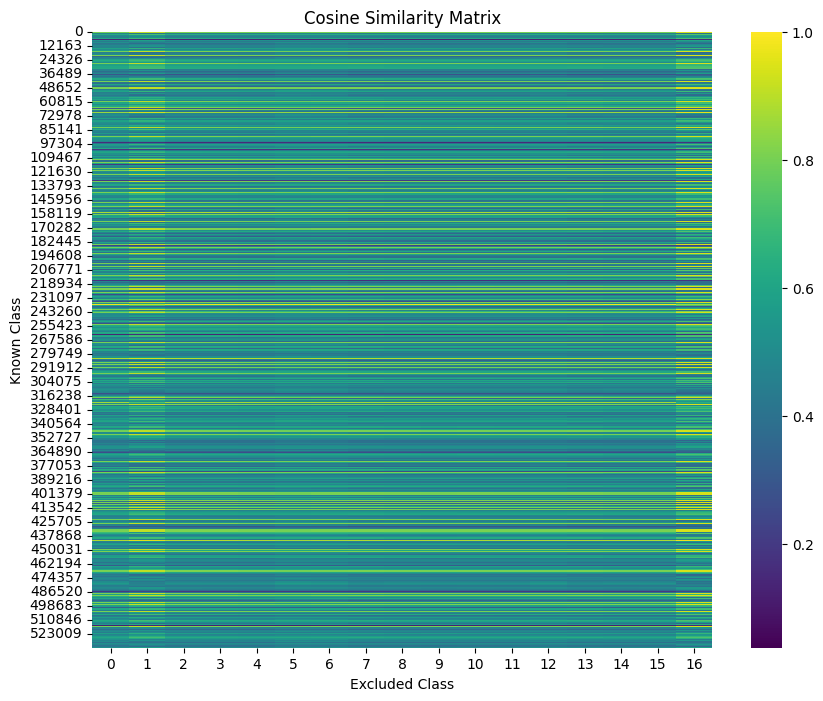

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False)  
plt.title("Cosine Similarity Matrix")
plt.xlabel("Excluded Class")
plt.ylabel("Known Class")
plt.show()

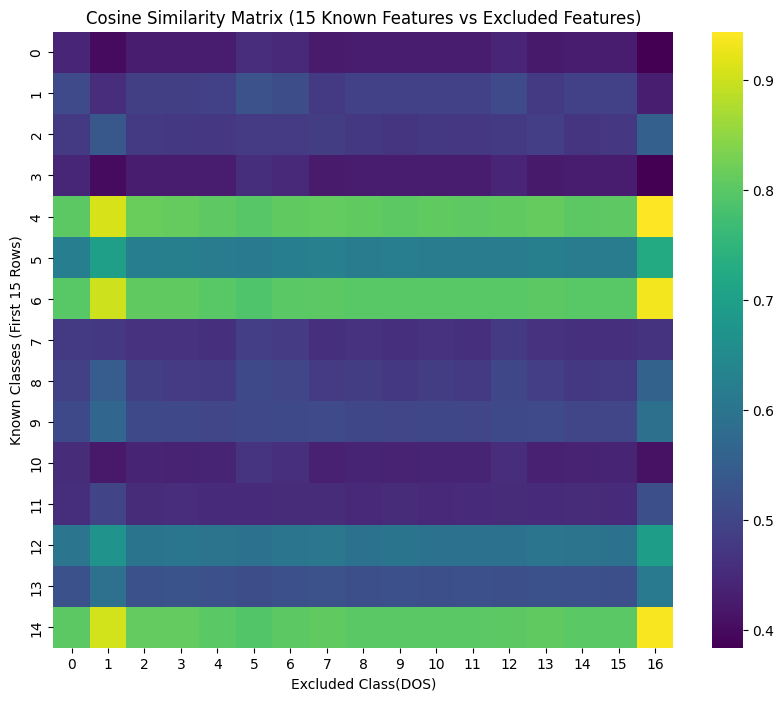

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the first 15 rows from known features
known_features_15 = known_features_flattened[:15]  

# Computing cosine similarity between the selected known features and the excluded features
similarity_matrix = cosine_similarity(known_features_15, excluded_features_flattened)

# Plotting the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', annot=False) 
plt.title("Cosine Similarity Matrix (15 Known Features vs Excluded Features)")
plt.xlabel("Excluded Class(DOS)")
plt.ylabel("Known Classes (First 15 Rows)")
plt.show()


In [55]:
predicted_indices = np.argmax(similarity_matrix, axis=0)  # Get index of max similarity score along columns

# Map the indices back to the corresponding attack class using y_known
predicted_attack_classes = y_known.iloc[predicted_indices].values

print(f"Predicted attack classes for the unknown samples: {predicted_attack_classes}")

Predicted attack classes for the unknown samples: ['xss' 'xss' 'xss' 'xss' 'xss' 'xss' 'xss' 'xss' 'xss' 'xss' 'xss' 'xss'
 'xss' 'xss' 'xss' 'xss' 'xss']
